In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./input/image.png")
h, w, _ = img.shape

![](./input/image.png)

In [3]:
# OCRを実行し、結果を出力する
extracted_text = pytesseract.image_to_string(img, lang="jpn")
print("Extracted Text:")
print(extracted_text)

Extracted Text:
CV strategy

iarifedKFo

Feature Enginieering

Cserのランク付け(見終わった数途中部全休作品見てる。

陸中・完了・ー時信人中邊の・守予定の割合と人中漠め完全視感の比)
producens制人会社.(然への(リスト化、着度エンコーディング欠損全の変数化、

会数、 会社ごとの出層度と平均

pisodes 人と視取ランク付け

9enres: 作品ジャンル. (数、 producer制会.(要]、lcensors: ライセンス所有社 (
 Sudios- スタジオ (本、yper TV OVA (オリジナルビデオアニメーション) など。 避の提供方
Ource:作品の元ネタ(ex ライトノベル)、ratne 年陣のOneHotEncoding

irec: 放映日(午で差記載されている場合もあります)の年、送時間分) 季節は入れとけば上がった
JaPanese_name:作品名同士公た物をレーペンシュタイン才離

ジャロ-ウィンクラー克の平均から見つけて同じクラスタにする

 anime2vectword2vecanimer user dim-64に圧結してそのまま特仙量とする

上人度計算はしたけど言うほどじゃなかったので捨てた

LightGBM Regression 5fola
XGBoost Regression 5fola
LightGBM Clessiicaton 5fol

PostProcess

他語フィルタリングすればよかった、やらなかったので分害路を立てなかったのは下集、userとanimeとの相関から特徴を作るアプロー
チは入れとけばよかったなとユーザーのアニメ視聴しました情報を使えたかが謗負の分かれ目だっ

EDUO】

PL12337 LB 14944

outoffold predicton

1

mm

正解ラベルの予測分布

1

eundmuh

sr 予測と検証と結果分布
oog




In [4]:
boxes = pytesseract.image_to_boxes(img, lang="jpn")
# boxes = [list(map(int, i)) for i in [b.split(" ")[1:-1] for b in boxes.split("\n")]]
boxes = [list(map(int, i)) for i in [b.split(" ")[1:-1] for b in boxes.split("\n")] if i]

In [5]:
for b in boxes:
    if not b:  # リストが空の場合
        continue  # 次のループへスキップ
    img = cv2.rectangle(img, (int(b[0]), h - int(b[1])), (int(b[2]), h - int(b[3])), (0, 255, 0), 2)

In [6]:
def calc_area(box):
    return ((box[2] - box[0]) * (box[3] - box[1]))

print(sum([calc_area(box) for box in boxes]) / (h * w))

0.20885802469135803


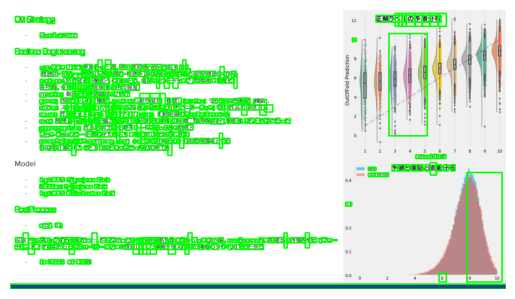

In [7]:
# 画像を表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # OpenCVはBGRフォーマットを使用するため、RGBに変換
plt.axis('off')  # 軸をオフにする
plt.show()  # 画像を表示